# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Fikri Kurnia
- Email: ds.fikri.kurnia@gmail.com
- Id Dicoding:

## Persiapan

### Menyiapkan library yang dibutuhkan

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib
import os

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',38)

In [4]:
!pip install pipreqsnb

### Menyiapkan data yang akan digunakan

In [5]:
PATH = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv"
try:
  data = pd.read_csv(PATH,delimiter=";")

except Exception as e:
  print(f"error {e}")

## Data Understanding

In [6]:
data.head(5)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [7]:
data.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Kesimpulan yang didapat :
- Marital_status : tipe data salah (to object)
- Gender : tipe data salah (to object)
- Displaced : tipe data salah (to object)
- Educational_special_needs : tipe data salah (to object)
- Debtor : tipe data salah (to object)
- Tuition_fees_up_to_date : tipe data salah (to object)
- Scholarship holder : tipe data salah (to object)
- International : tipe data salah (to object)
- Daytime_evening_attendance : tipe data salah (to object)
- Application_mode : tipe data salah (to object)
- Course : tipe data salah (to object)
- Previous_qualification : tipe data salah (to object)
- Previous_qualification_grade : tidak memiliki keterangan fitur yang jelas dan terlihat redundant
- Nacionality : tipe data salah (to object)
- Mothers_qualification : tipe data salah (to object)
- Fathers_qualification : tipe data salah (to object)
- Mothers_occupation : tipe data salah (to object)
- Fathers_occupation : tipe data salah (to object)
- Admission grade	: tidak memiliki keterangan fitur yang jelas
- Age_at_enrollment : ganti nama kolom menjadi Age

### Mengubah Tipe Data dan Memperbaiki Value

In [9]:
# Fungsi untuk mengganti tipe data
def retype(data: pd.DataFrame, col: list[str])->pd.DataFrame:
    df = data.copy()

    for feature in col:
        df[feature] = df[feature].astype(str)

    return df

In [10]:
# Call Function (retype)
col_retype = ['Gender','Marital_status','Application_mode','Course','Previous_qualification','Nacionality','Mothers_qualification','Fathers_qualification',
              'Mothers_occupation','Fathers_occupation','Displaced','Educational_special_needs','Debtor','Tuition_fees_up_to_date','Scholarship_holder','International',
              'Daytime_evening_attendance']

data = retype(data, col_retype)
data[col_retype].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Gender                      4424 non-null   object
 1   Marital_status              4424 non-null   object
 2   Application_mode            4424 non-null   object
 3   Course                      4424 non-null   object
 4   Previous_qualification      4424 non-null   object
 5   Nacionality                 4424 non-null   object
 6   Mothers_qualification       4424 non-null   object
 7   Fathers_qualification       4424 non-null   object
 8   Mothers_occupation          4424 non-null   object
 9   Fathers_occupation          4424 non-null   object
 10  Displaced                   4424 non-null   object
 11  Educational_special_needs   4424 non-null   object
 12  Debtor                      4424 non-null   object
 13  Tuition_fees_up_to_date     4424 non-null   obje

In [11]:
# Data Mapping
yesNo_mapping = {
    "1": "Yes",
    "0": "No"
}

gender_mapping = {
    "1": "Male",
    "0": "Female"
}

marital_status_mapping = {
    "1": "Single",
    "2": "Married",
    "3": "Widower",
    "4": "Divorced",
    "5": "Facto union",
    "6": "Legally separated"
}

application_mode_mapping = {
    "1": "1st phase - general contingent",
    "2": "Ordinance No. 612/93",
    "5": "1st phase - special contingent (Azores Island)",
    "7": "Holders of other higher courses",
    "10": "Ordinance No. 854-B/99",
    "15": "International student (bachelor)",
    "16": "1st phase - special contingent (Madeira Island)",
    "17": "2nd phase - general contingent",
    "18": "3rd phase - general contingent",
    "26": "Ordinance No. 533-A/99, item b2) (Different Plan)",
    "27": "Ordinance No. 533-A/99, item b3 (Other Institution)",
    "39": "Over 23 years old",
    "42": "Transfer",
    "43": "Change of course",
    "44": "Technological specialization diploma holders",
    "51": "Change of institution/course",
    "53": "Short cycle diploma holders",
    "57": "Change of institution/course (International)"
}

course_mapping = {
    "33": "Biofuel Production Technologies",
    "171": "Animation and Multimedia Design",
    "8014": "Social Service (evening attendance)",
    "9003": "Agronomy",
    "9070": "Communication Design",
    "9085": "Veterinary Nursing",
    "9119": "Informatics Engineering",
    "9130": "Equinculture",
    "9147": "Management",
    "9238": "Social Service",
    "9254": "Tourism",
    "9500": "Nursing",
    "9556": "Oral Hygiene",
    "9670": "Advertising and Marketing Management",
    "9773": "Journalism and Communication",
    "9853": "Basic Education",
    "9991": "Management (evening attendance)"
}

prev_education_mapping = {
    "1": "Secondary education",
    "2": "Higher education - bachelor's degree",
    "3": "Higher education - degree",
    "4": "Higher education - master's",
    "5": "Higher education - doctorate",
    "6": "Frequency of higher education",
    "9": "12th year of schooling - not completed",
    "10": "11th year of schooling - not completed",
    "12": "Other - 11th year of schooling",
    "14": "10th year of schooling",
    "15": "10th year of schooling - not completed",
    "19": "Basic education 3rd cycle (9th/10th/11th year) or equiv.",
    "38": "Basic education 2nd cycle (6th/7th/8th year) or equiv.",
    "39": "Technological specialization course",
    "40": "Higher education - degree (1st cycle)",
    "42": "Professional higher technical course",
    "43": "Higher education - master (2nd cycle)"
}

nacionality_mapping = {
    "1": "Portuguese",
    "2": "German",
    "6": "Spanish",
    "11": "Italian",
    "13": "Dutch",
    "14": "English",
    "17": "Lithuanian",
    "21": "Angolan",
    "22": "Cape Verdean",
    "24": "Guinean",
    "25": "Mozambican",
    "26": "Santomean",
    "32": "Turkish",
    "41": "Brazilian",
    "62": "Romanian",
    "100": "Moldova",
    "101": "Mexican",
    "103": "Ukrainian",
    "105": "Russian",
    "108": "Cuban",
    "109": "Colombian"
}



In [12]:
# Mapping
data["Course"] = data["Course"].map(course_mapping)
data["Previous_qualification"] = data["Previous_qualification"].map(prev_education_mapping)
data["Nacionality"] = data["Nacionality"].map(nacionality_mapping)
data["Marital_status"] = data["Marital_status"].map(marital_status_mapping)
data["Application_mode"] = data["Application_mode"].map(application_mode_mapping)
data["Gender"] = data["Gender"].map(gender_mapping)

data[['Displaced','Educational_special_needs','Debtor','Tuition_fees_up_to_date',
     'Scholarship_holder','International','Daytime_evening_attendance']] = data[['Displaced','Educational_special_needs','Debtor','Tuition_fees_up_to_date',
     'Scholarship_holder','International','Daytime_evening_attendance']].replace(yesNo_mapping)

data[["Mothers_qualification","Fathers_qualification"]] = data[["Mothers_qualification","Fathers_qualification"]].applymap(lambda x: prev_education_mapping.get(x, "unknown"))


In [13]:
# Data 1
data_1 = data.copy()
data_1.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,Single,2nd phase - general contingent,5,Animation and Multimedia Design,Yes,Secondary education,122.0,Portuguese,Basic education 3rd cycle (9th/10th/11th year)...,Other - 11th year of schooling,5,9,127.3,Yes,No,No,Yes,Male,No,20,No,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,Single,International student (bachelor),1,Tourism,Yes,Secondary education,160.0,Portuguese,Secondary education,Higher education - degree,3,3,142.5,Yes,No,No,No,Male,No,19,No,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,Single,1st phase - general contingent,5,Communication Design,Yes,Secondary education,122.0,Portuguese,unknown,unknown,9,9,124.8,Yes,No,No,No,Male,No,19,No,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,Single,2nd phase - general contingent,2,Journalism and Communication,Yes,Secondary education,122.0,Portuguese,Basic education 2nd cycle (6th/7th/8th year) o...,unknown,5,3,119.6,Yes,No,No,Yes,Female,No,20,No,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,Married,Over 23 years old,1,Social Service (evening attendance),No,Secondary education,100.0,Portuguese,unknown,Basic education 2nd cycle (6th/7th/8th year) o...,9,9,141.5,No,No,No,Yes,Female,No,45,No,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Hanya beberapa fitur yang dilakukan mapping dikarenakan tidak adanya keterangan terkait fitur lain.

### Univariate Analysis

Plot untuk fitur target

<Axes: >

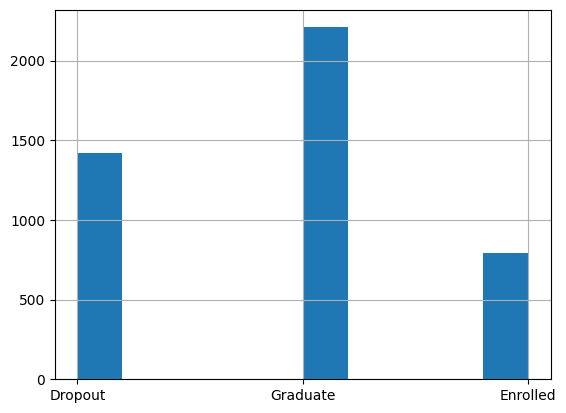

In [14]:
target = data["Status"]
target.hist(grid=True)

tidak terlalu balanced but oke

### Kolom Numerik

In [15]:
# Helper Function for Univariate Numeric Feature vs Status
def numerical_dis_plot(features: list[str],
                       df: pd.DataFrame,
                       target: str = "Status",
                       showfliers: bool = True) -> None:
    for feature in features:
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))

        # --- Boxplot
        sns.boxplot(x=target, y=feature, data=df, ax=axes[0], showfliers=showfliers)
        axes[0].set_title(f"Distribusi {feature} berdasarkan {target}")

        # --- Countplot (grouped)
        counts = df.groupby([target, feature]).size().reset_index(name="count")
        sns.barplot(x=target, y="count", hue=feature, data=counts, ax=axes[1])
        axes[1].set_title(f"Jumlah {feature} berdasarkan {target}")

        plt.tight_layout()
        plt.show()


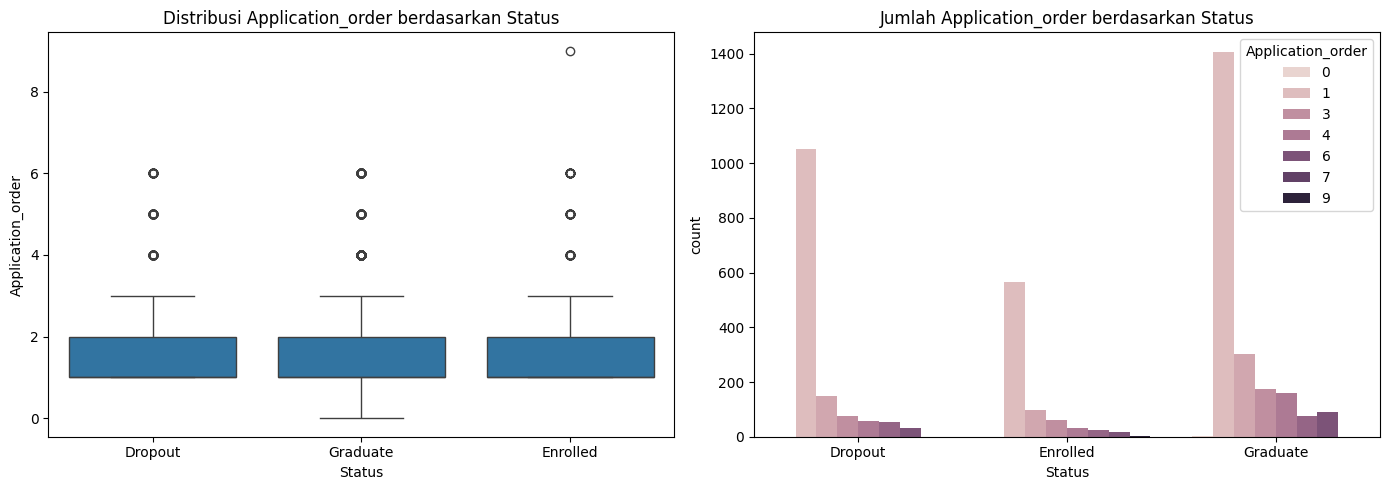

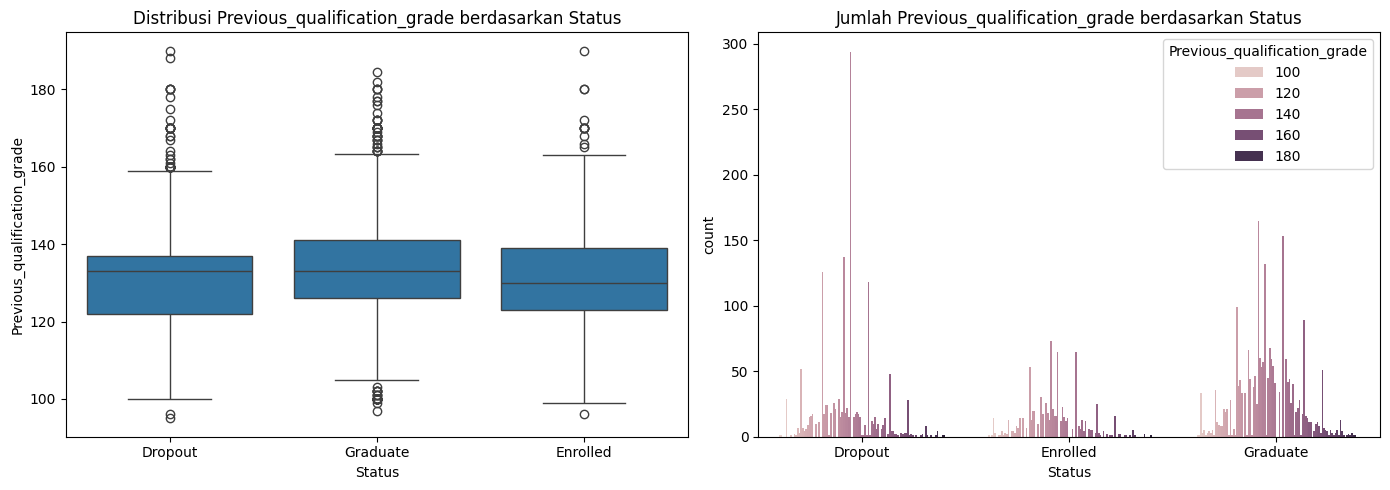

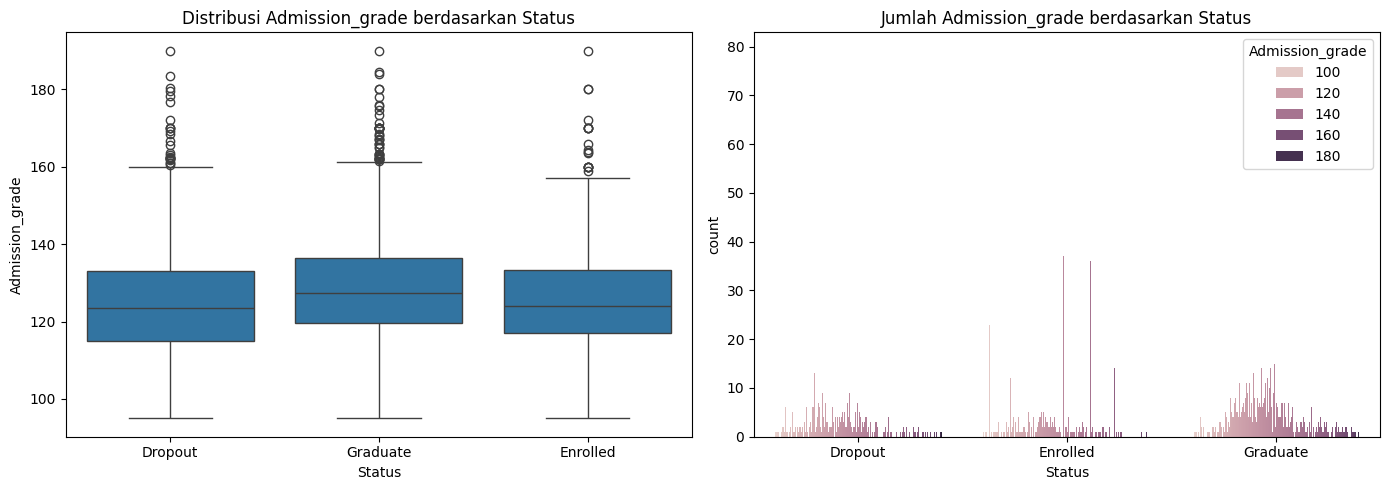

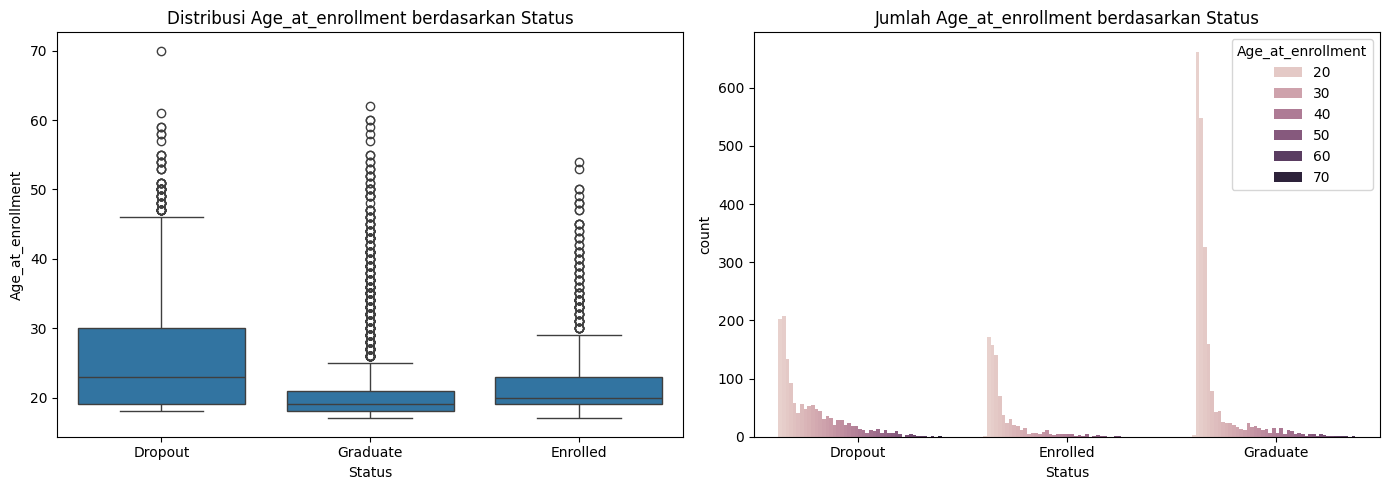

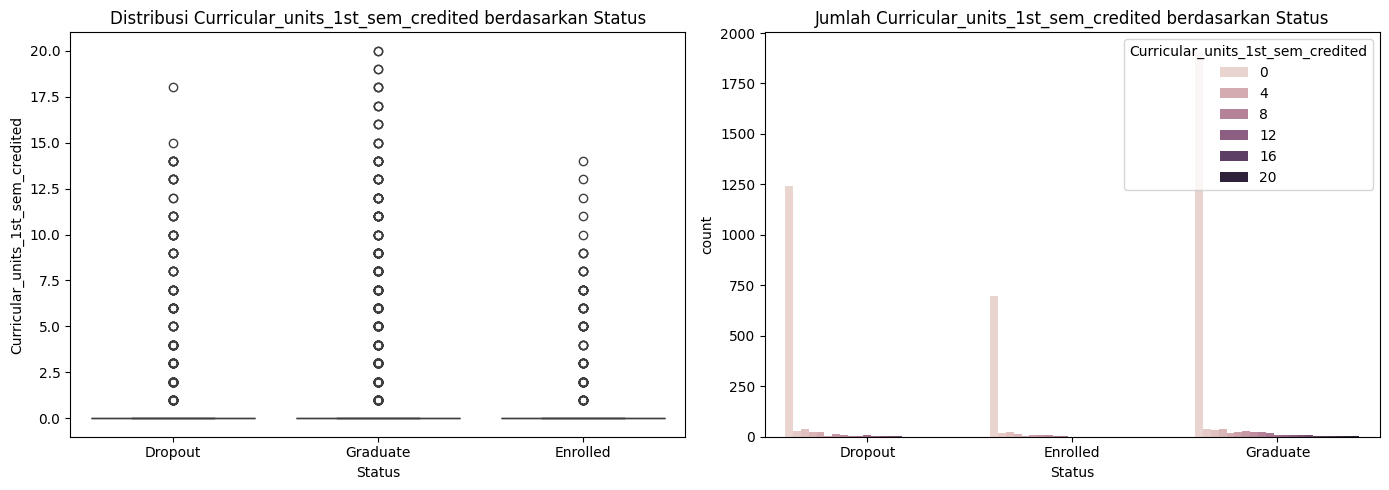

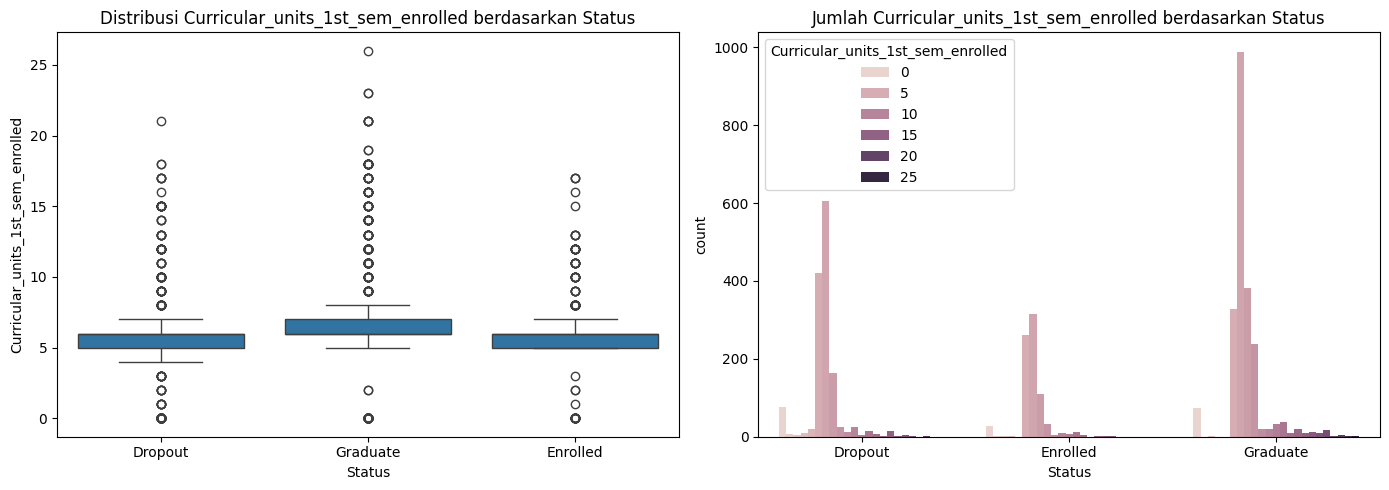

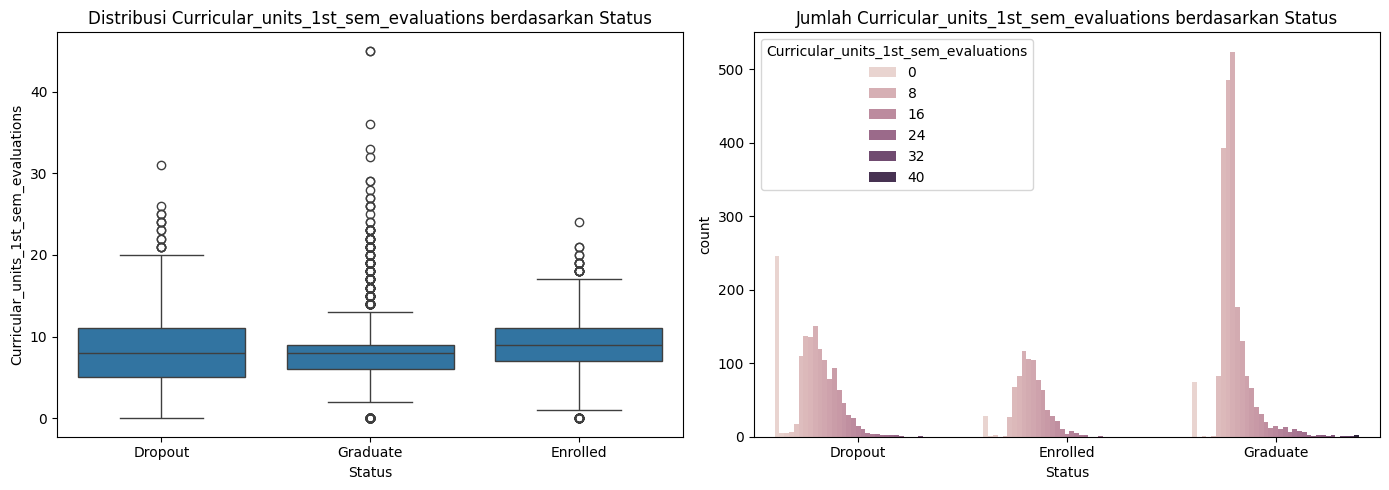

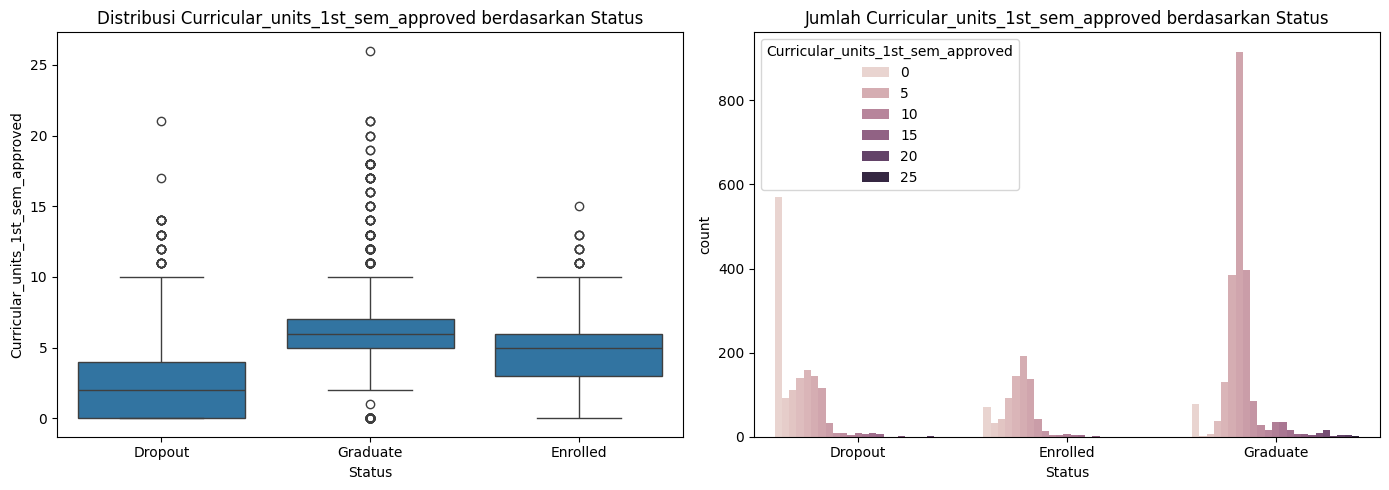

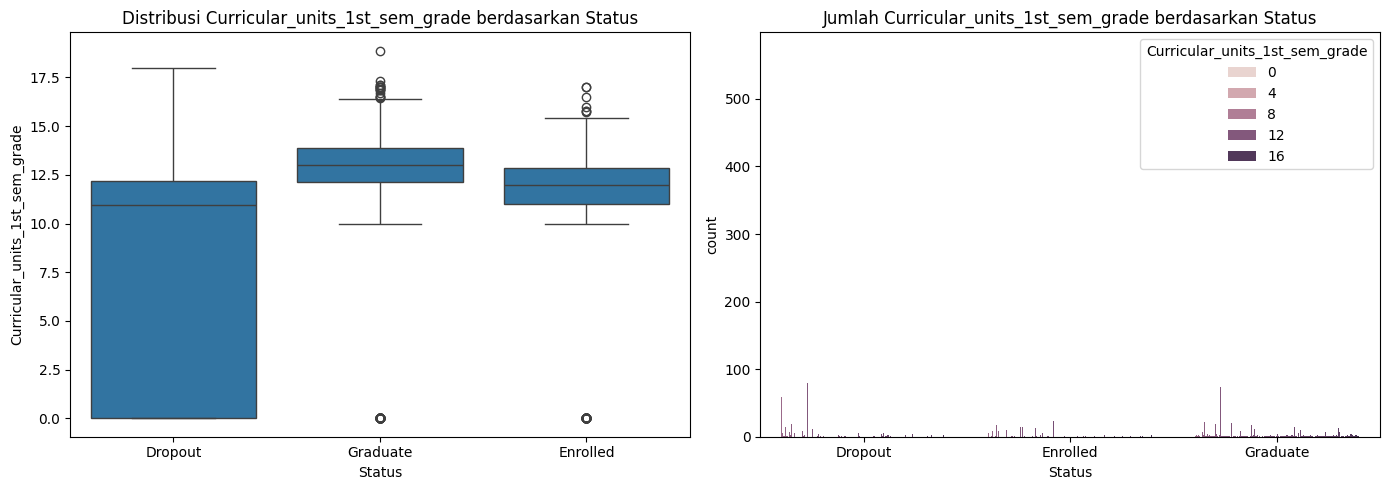

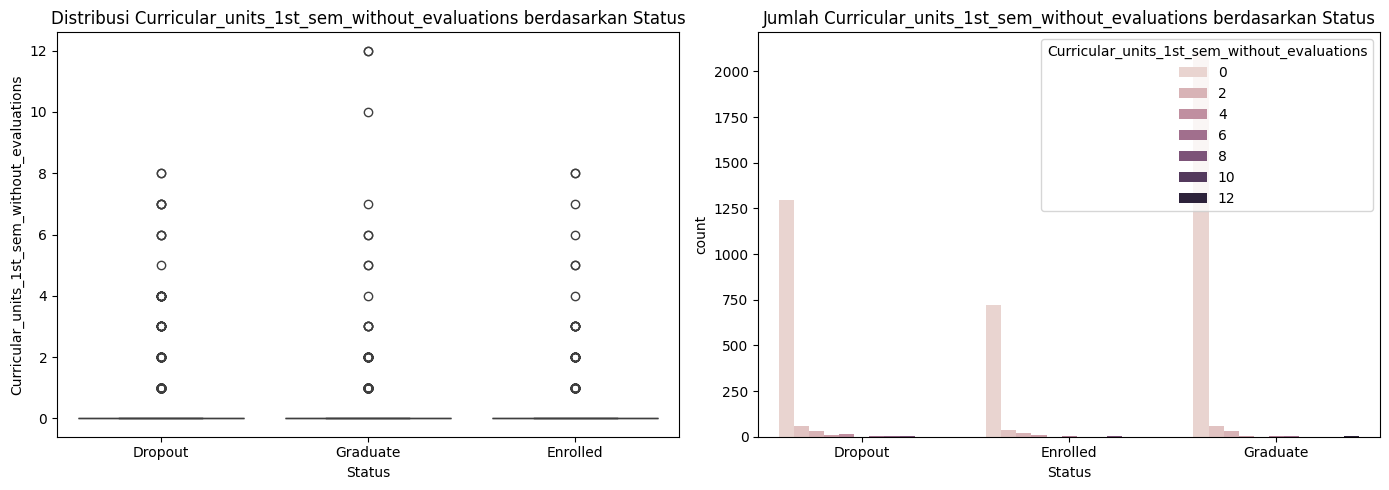

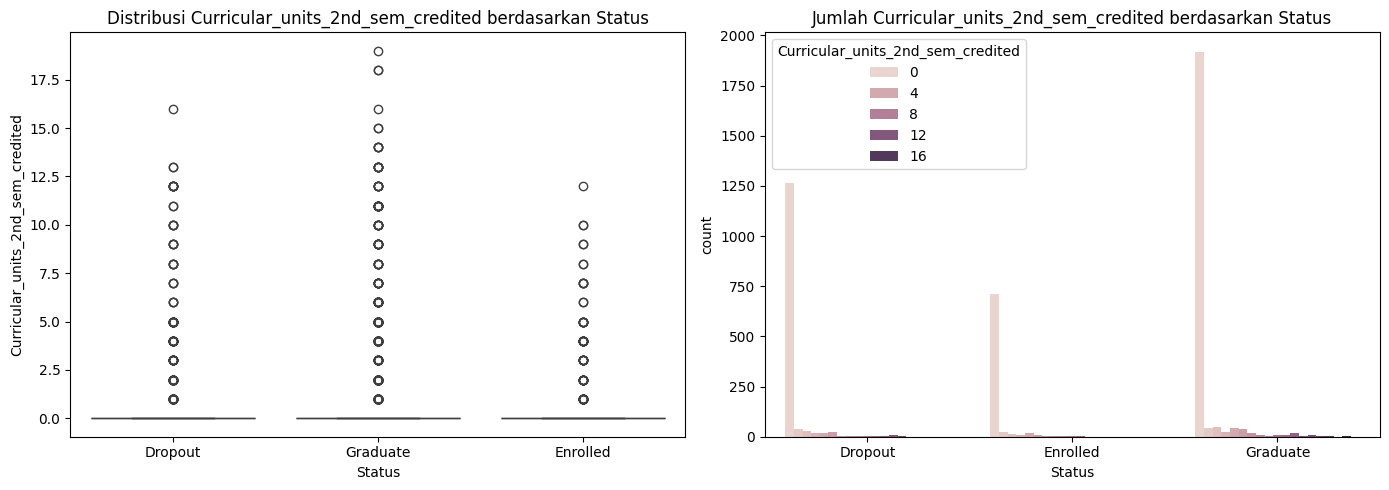

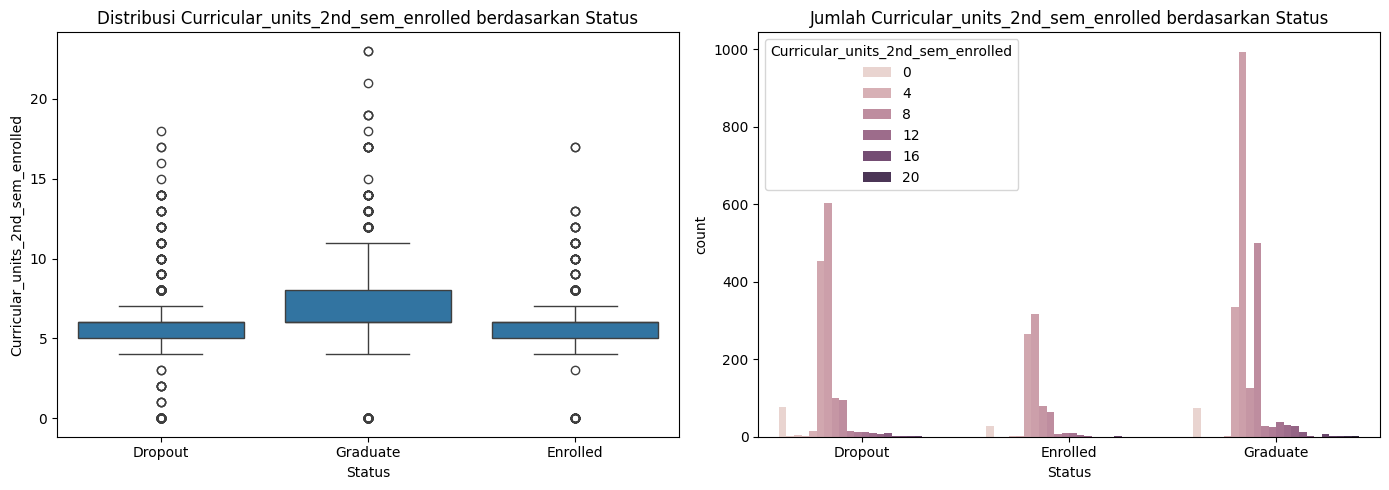

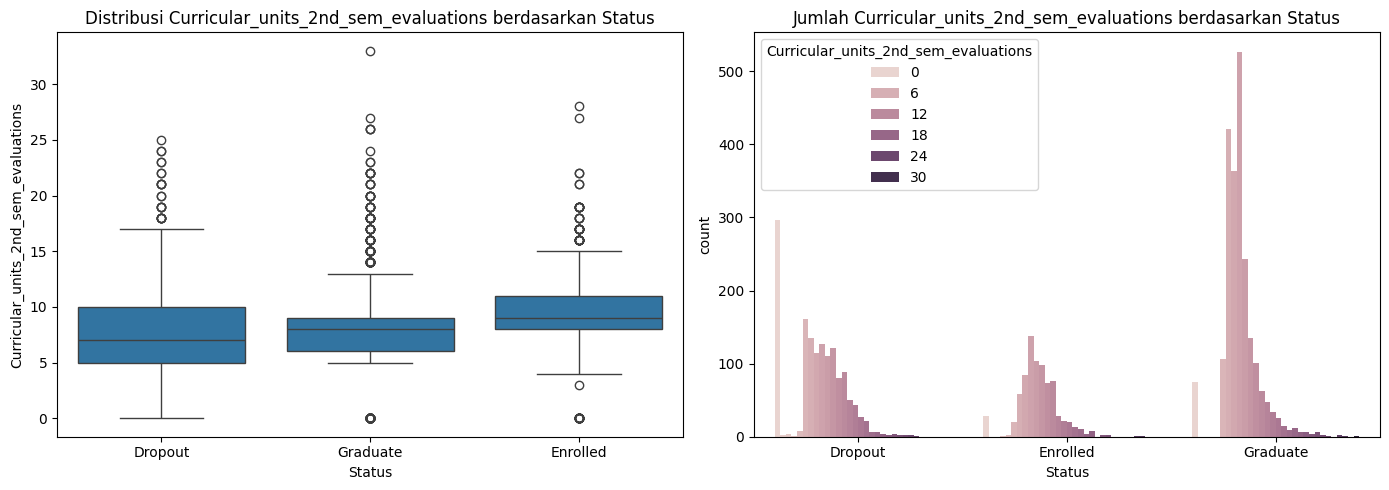

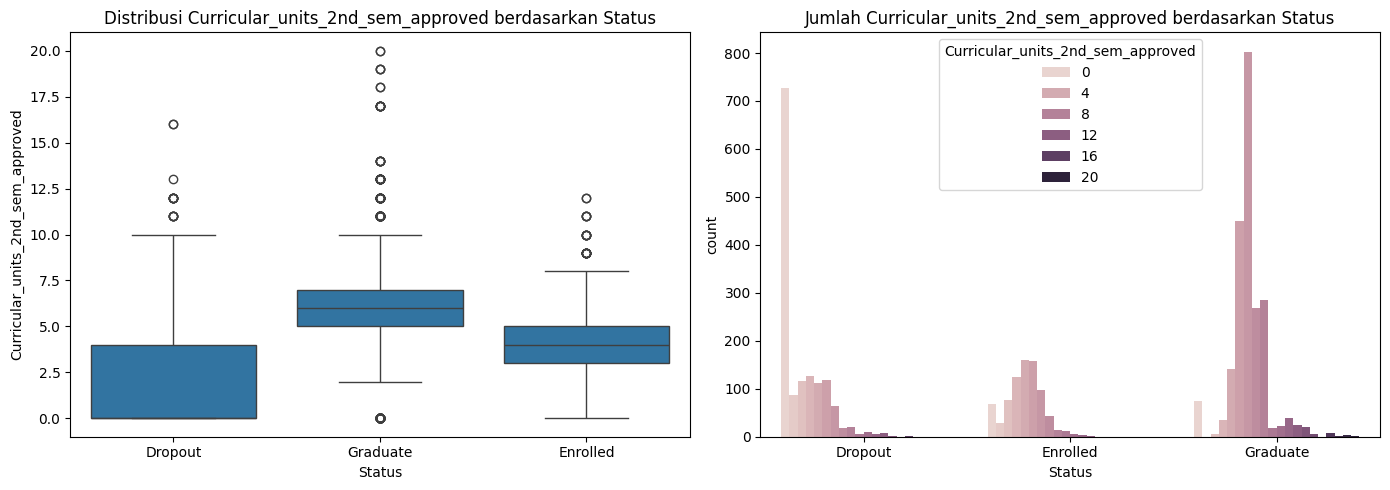

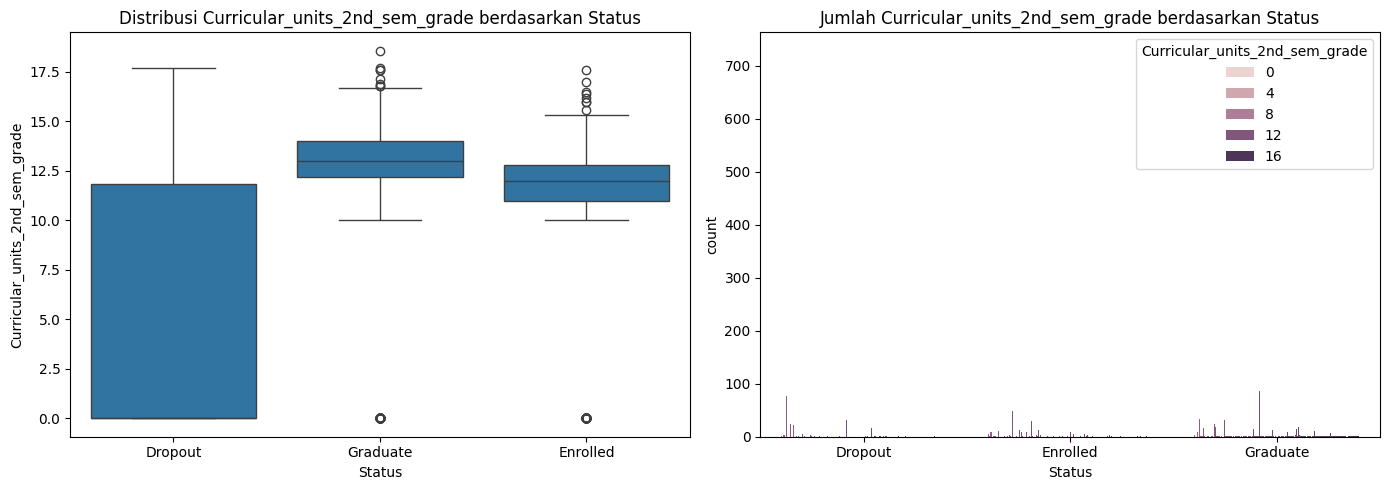

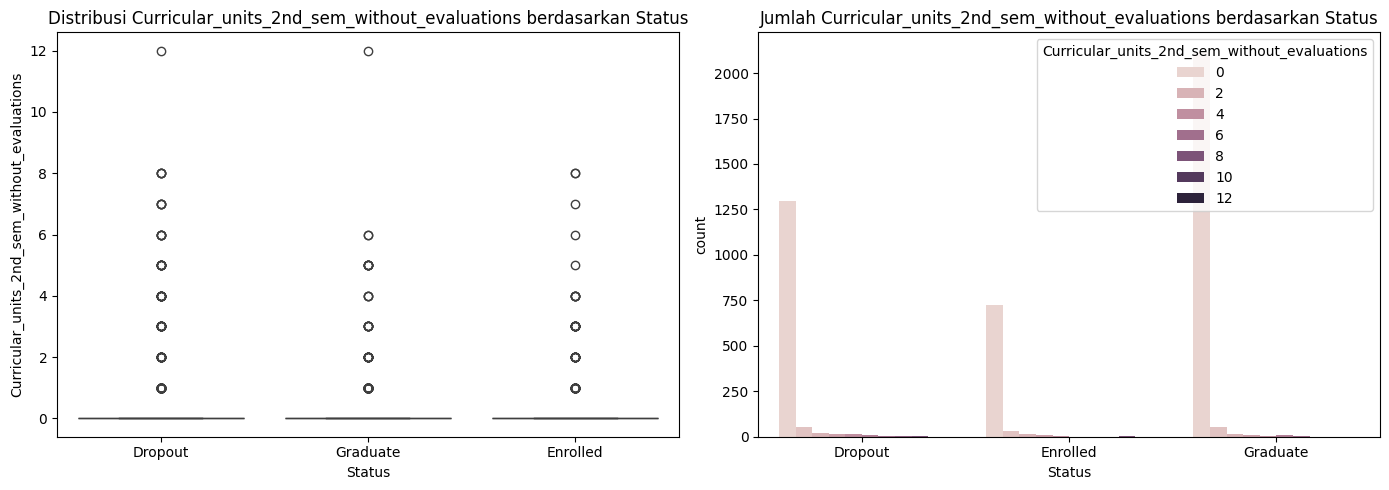

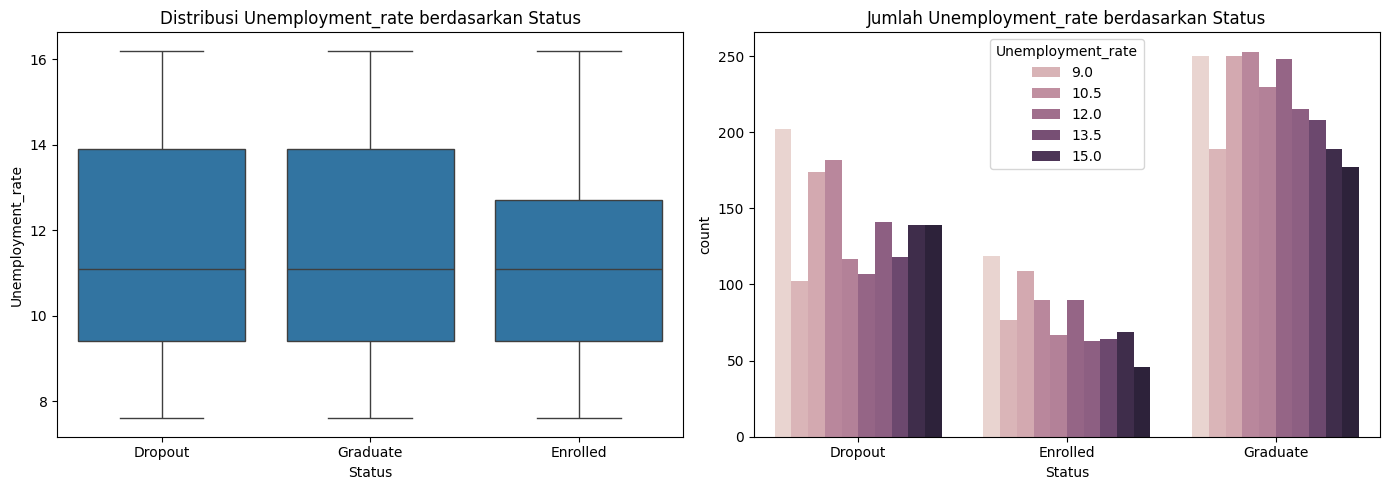

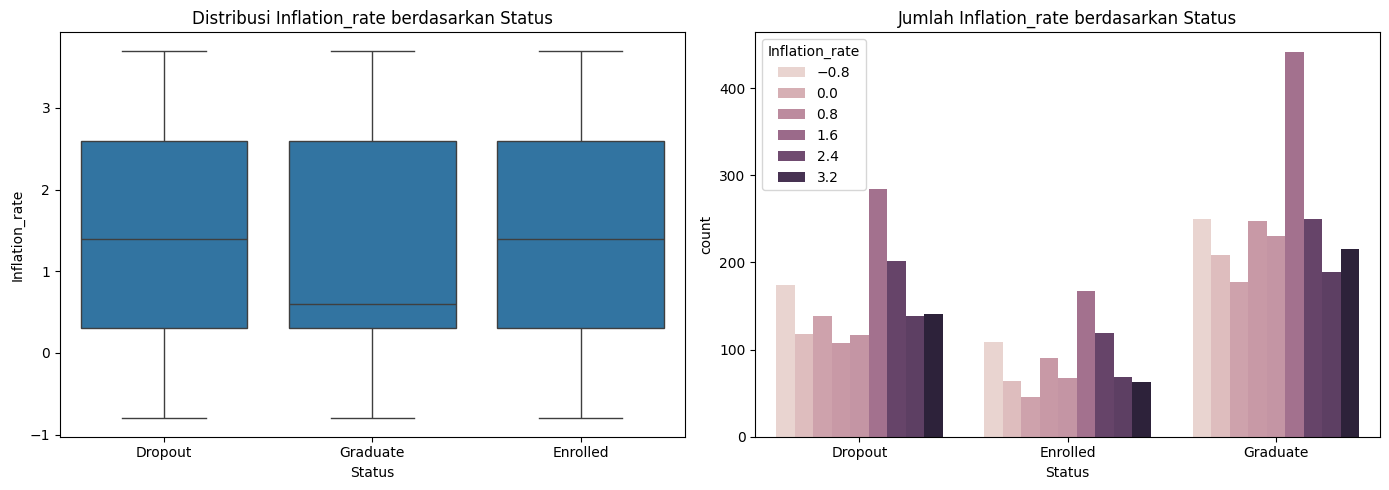

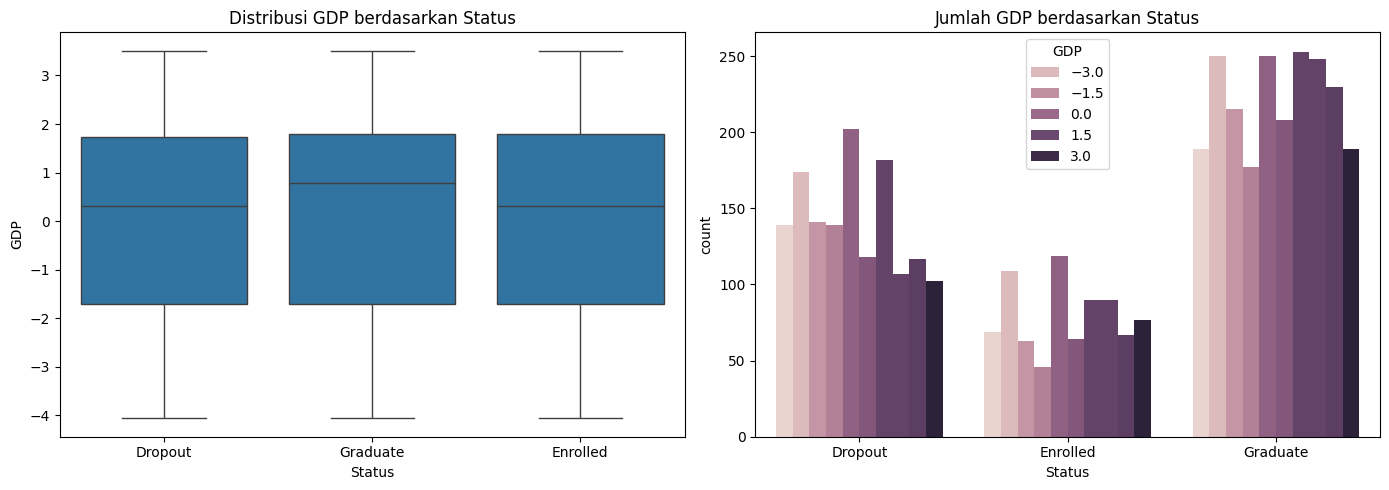

In [16]:
NUMERIC_FEATURE = data_1.select_dtypes(include= np.number).columns
numerical_dis_plot(NUMERIC_FEATURE,
                   data_1,
                   "Status")


Kesimpulan yang didapat:

Terlihat bahwa pada beberapa fitur memiliki nilai yang kurang bermakna seperti :
- Curricual_units_2nd_sem_without_evaluations, Curricular_units_2nd_sem_credited,Curricular_units_1st_sem_without_evaluations, dan Curricular_units_1st_sem_credited,Unemployment_rate,GDP,Inflation_rate

Maka dari itu, fitur fitur tersebut akan didrop karena tidak memiliki pola yang bermakna


In [17]:
# Fitur Yang Kurang Berguna
fitur_drop =['Curricular_units_2nd_sem_without_evaluations',
             'Curricular_units_2nd_sem_credited',
             'Curricular_units_1st_sem_without_evaluations',
             'Curricular_units_1st_sem_credited','GDP','Unemployment_rate','Inflation_rate']

In [18]:
data_1.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_wit

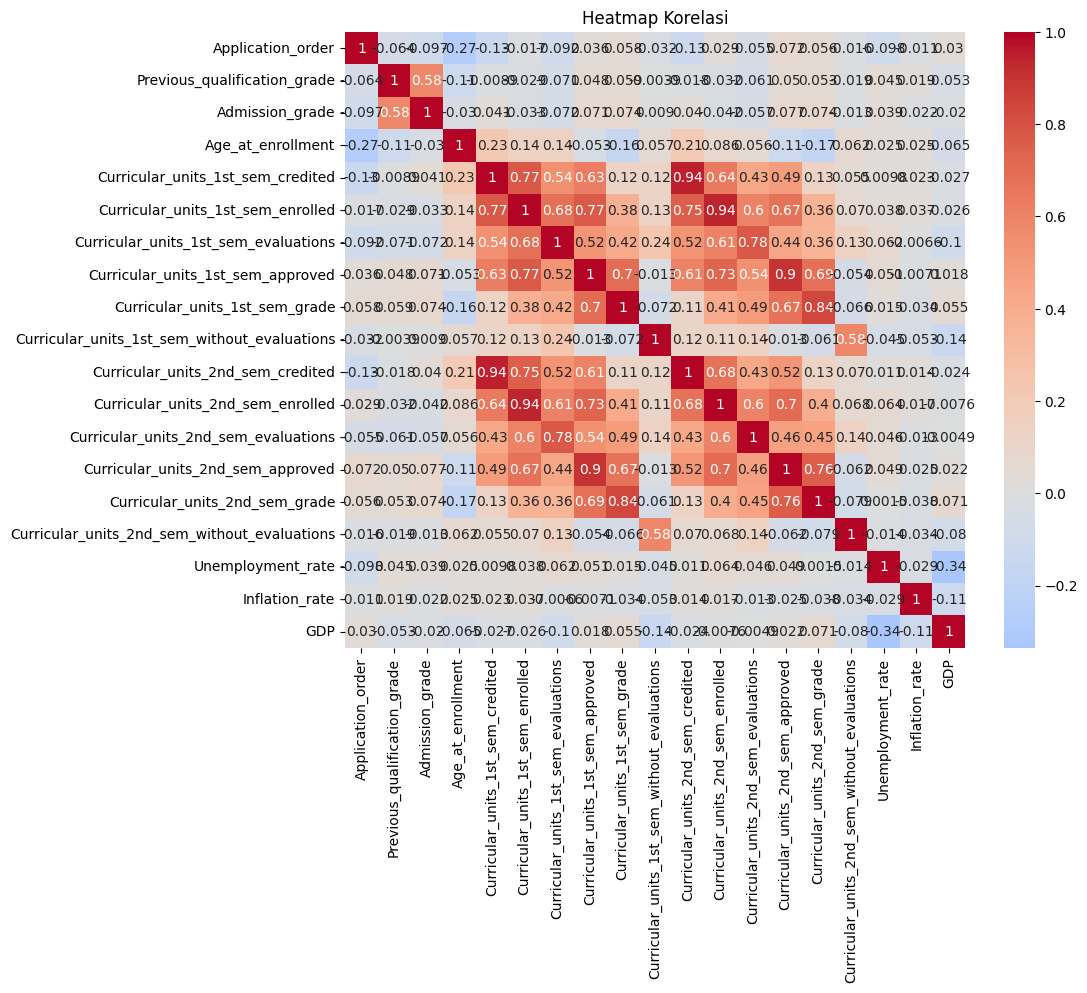

In [19]:
corr = data_1.select_dtypes(np.number).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Heatmap Korelasi")
plt.show()


Terlihat pada beberapa fitur memiliki nilai korelasi yang sangat tinggi. Fitur-fitur tersebut dapat terindikasi redundant atau multikolinearitas, ini menjadi acuan kedepannya untuk di drop salah satu fitur atau dilakukan PCA.

Fitur tersebut meliputi
fitur_redundant = ['Curricular_units_1st_sem_enrolled','Curricular_units_2nd_sem_enrolled','Curricular_units_1st_sem_approved','Curricular_units_2nd_sem_approved','Curricular_units_1st_sem_grade','Curricular_units_2nd_sem_grade','Curricular_units_1st_sem_evaluations','Curricular_units_2nd_sem_evaluations']

Fitur-fitur tersebut akan dilakukan PCA atau di-drop salah satu feature dari pasangan fitur tersebut.


### Periksa Multikolinearitas (VIF)

In [20]:
# Kolom Redundant
fitur_redundant =  ['Curricular_units_2nd_sem_enrolled',
                    'Curricular_units_2nd_sem_approved',
                    'Curricular_units_2nd_sem_grade',
                    'Curricular_units_2nd_sem_evaluations']

fitur_pca = ['Curricular_units_1st_sem_enrolled','Curricular_units_2nd_sem_enrolled',
              'Curricular_units_1st_sem_approved','Curricular_units_2nd_sem_approved',
              'Curricular_units_1st_sem_grade','Curricular_units_2nd_sem_grade',
              'Curricular_units_1st_sem_evaluations','Curricular_units_2nd_sem_evaluations']

In [21]:
# Helper Function for Calculate VIF
def calculate_VIF(data: pd.DataFrame) -> pd.DataFrame:
    X = data.select_dtypes(include='number').copy()
    X_const = add_constant(X)

    vif_data = pd.DataFrame()
    vif_data["feature"] = X_const.columns
    vif_data["VIF"] = [variance_inflation_factor(X_const.values, i)
                       for i in range(X_const.shape[1])]

    vif_data = vif_data[vif_data["feature"] != "const"]

    return vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)

In [22]:
# Call Function VIF untuk Seluruh Fitur
calculate_VIF(data_1)

,feature,VIF
0,Curricular_units_1st_sem_enrolled,23.487746
1,Curricular_units_2nd_sem_enrolled,16.472423
2,Curricular_units_1st_sem_credited,15.569861
3,Curricular_units_1st_sem_approved,12.642009
4,Curricular_units_2nd_sem_credited,12.431885
5,Curricular_units_2nd_sem_approved,10.154566
6,Curricular_units_2nd_sem_grade,5.478718
7,Curricular_units_1st_sem_grade,4.980271
8,Curricular_units_1st_sem_evaluations,3.970726
9,Curricular_units_2nd_sem_evaluations,3.329162


Terlihat bahwa beberapa fitur terindikasi memiliki multikolinearitas yang kuat dikarenakan nilai VIF > 10. Langkah selanjutnya akan dilakukan drop salah satu pasangan pada fitur yang redundant atau dilakukan PCA

### Fitur Kategori

In [23]:
# Helper Function for Univariate Category Feature vs Status
def category_dis_plot(data: pd.DataFrame, cols: list[str]) -> None:
    n_features = len(cols)
    fig, axes = plt.subplots(n_features, 1, figsize=(12, 5 * n_features), sharex=False)

    # Jika hanya 1 fitur, jadikan axes list supaya bisa diiterasi
    if n_features == 1:
        axes = [axes]

    for i, feature in enumerate(cols):
        sns.countplot(
            data=data,
            y="Status",
            hue=feature,
            ax=axes[i]
        )
        axes[i].set_title(f"Distribusi Status berdasarkan {feature}", fontsize=14, weight="bold")
        axes[i].set_xlabel("Jumlah")
        axes[i].set_ylabel("Status")
        axes[i].legend(title=feature, bbox_to_anchor=(1.05, 1), loc="upper left")

    plt.tight_layout()
    plt.show()

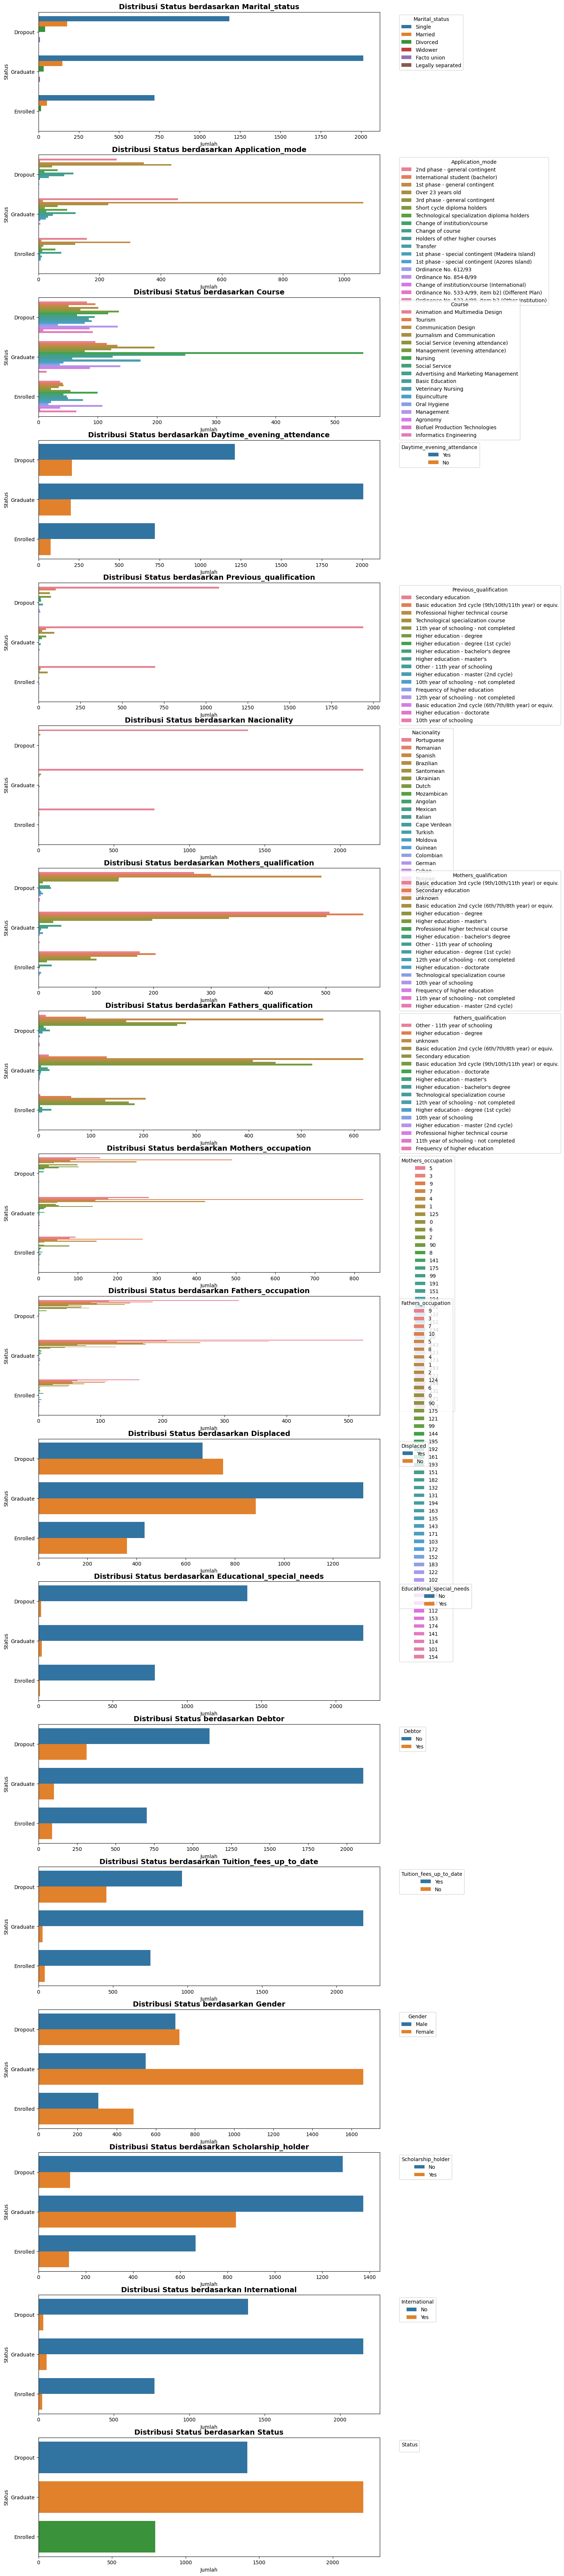

In [24]:
CATEGORY_FEATURE = data_1.select_dtypes(exclude=np.number).columns.tolist()
category_dis_plot(data_1, CATEGORY_FEATURE)

Berdasarkan hasil visualisasi di atas dapat ditemukan pola menarik, yaitu:
- Mahasiswa yang melakukan dropout mayoritas ada perempuan
- Mahasiswa yang memiliki hutang memiliki persentase drop out terbanyak
- Mahasiswa yang belum melunasi biaya kuliahnya memiliki persentase drop out terbanyak. Dapat disimpulkan sementara bahwasannya biaya menjadi salah satu faktor utama mahasiswa memutuskan drop out

Beberapa fitur penting yang ditemukan seperti:

fitur_kategori = ['Scholarship_holder','Gender','Tuition_fees_up_to_date','Debtor','Displaced','Course']

## Data Preparation / Preprocessing

### Encoding

In [25]:
data_2 = data_1.copy()

In [26]:
# Rename Kolom
data_2['Age'] = data_2['Age_at_enrollment']
data.drop(columns = 'Age_at_enrollment', axis=1, inplace=True)

cols = list(data_2.columns)
cols[35], cols[36] = cols[36], cols[35]
data_2 = data_2[cols]

In [27]:
# Drop Fitur yang Kurang Bergun Berdasarkan Univariate Analisis
data_2 = data_2.drop(columns=fitur_drop, axis=1)

In [28]:
# Drop Fitur Redundant
data_2 = data_2.drop(columns=fitur_redundant, axis=1)

In [29]:
# Data Numerik
data_numerik = data_2.select_dtypes(np.number)

In [30]:
# Data Kategori for Encoding
fitur_kategori = ['Scholarship_holder','Gender','Tuition_fees_up_to_date','Debtor','Displaced','Course']
fitur_target = ['Status']
data_encoding = data_1[fitur_kategori+fitur_target]

In [31]:
# Helper Function for Encoding
def encoding(data: pd.DataFrame, save_encoders: bool = True, encoder_path: str = "encoders.joblib") -> pd.DataFrame:
    df = data.copy()
    encoders = {}  # Dictionary to store all encoders

    for feature in df.columns.tolist():
        encoder = LabelEncoder()
        encoder.fit(df[feature])
        df[feature] = encoder.transform(df[feature])
        encoders[feature] = encoder  # Store encoder in dictionary

        print(f"✅ Encoded {feature}: {len(encoder.classes_)} unique values")
        print(f"   Classes: {list(encoder.classes_)}")

    if save_encoders:
        # Create directory if it doesn't exist
        encoder_dir = os.path.dirname(encoder_path)
        if encoder_dir and not os.path.exists(encoder_dir):
            os.makedirs(encoder_dir)

        # Save all encoders in one file
        joblib.dump(encoders, encoder_path)
        print(f"🔧 All encoders saved to: {encoder_path}")
        print(f"   Total encoders saved: {len(encoders)}")

    return df

In [32]:
data_encoded = encoding(data_encoding)
data_encoded.head()

✅ Encoded Scholarship_holder: 2 unique values
   Classes: ['No', 'Yes']
✅ Encoded Gender: 2 unique values
   Classes: ['Female', 'Male']
✅ Encoded Tuition_fees_up_to_date: 2 unique values
   Classes: ['No', 'Yes']
✅ Encoded Debtor: 2 unique values
   Classes: ['No', 'Yes']
✅ Encoded Displaced: 2 unique values
   Classes: ['No', 'Yes']
✅ Encoded Course: 17 unique values
   Classes: ['Advertising and Marketing Management', 'Agronomy', 'Animation and Multimedia Design', 'Basic Education', 'Biofuel Production Technologies', 'Communication Design', 'Equinculture', 'Informatics Engineering', 'Journalism and Communication', 'Management', 'Management (evening attendance)', 'Nursing', 'Oral Hygiene', 'Social Service', 'Social Service (evening attendance)', 'Tourism', 'Veterinary Nursing']
✅ Encoded Status: 3 unique values
   Classes: ['Dropout', 'Enrolled', 'Graduate']
🔧 All encoders saved to: encoders.joblib
   Total encoders saved: 7


,Scholarship_holder,Gender,Tuition_fees_up_to_date,Debtor,Displaced,Course,Status
0,0,1,1,0,1,2,0
1,0,1,0,0,1,15,2
2,0,1,0,0,1,5,0
3,0,0,1,0,1,8,2
4,0,0,1,0,0,14,2


Mengapa menggunakan LabelEncoder bukan metode encoding lainnya? Karena dataset mayoritas memiliki nilai kategori, maka dari itu model yang akan digunakan menggunakan base tree model yang mana tidak terpengaruh terhadap LabelEncoder

### Data Final

In [33]:
# Data Final
data_final = pd.concat(
    [data_numerik.reset_index(drop=True),
     data_encoded.reset_index(drop=True)],
    axis=1
)
data_final.head()

,Application_order,Previous_qualification_grade,Admission_grade,Age_at_enrollment,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Age,Scholarship_holder,Gender,Tuition_fees_up_to_date,Debtor,Displaced,Course,Status
0,5,122.0,127.3,20,0,0,0,0.000000,20,0,1,1,0,1,2,0
1,1,160.0,142.5,19,6,6,6,14.000000,19,0,1,0,0,1,15,2
2,5,122.0,124.8,19,6,0,0,0.000000,19,0,1,0,0,1,5,0
3,2,122.0,119.6,20,6,8,6,13.428571,20,0,0,1,0,1,8,2
4,1,100.0,141.5,45,6,9,5,12.333333,45,0,0,1,0,0,14,2


## Modeling

### Spliting Data

In [34]:
X = data_final.drop(columns='Status', axis=1)
y = data_final['Status']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=2025,
    stratify=y)

### Model Building

### Base Tree Model

#### Decision Tree

In [36]:
# Decision Tree
tree_model = DecisionTreeClassifier(random_state=2025)

param_grid = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "max_features": [None, "sqrt", "log2"],
    "class_weight": [None, "balanced"]
}

grid_search_1 = GridSearchCV(
    estimator=tree_model,
    param_grid=param_grid,
    scoring="roc_auc_ovr",
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search_1.fit(X_train, y_train)
best_param_tree = grid_search_1.best_params_
print("Best Parameters:", best_param_tree)
print("Best ROC-AUC:", grid_search_1.best_score_)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best ROC-AUC: 0.8232080688099754


In [37]:
tree_model_final = DecisionTreeClassifier(**best_param_tree, random_state=2025)
tree_model_final.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=2025)

#### Random Forest

In [38]:
# Random Forest
rf_model = RandomForestClassifier(random_state=2025)

param_grid_rf = {
    "n_estimators": [100, 300],
    "max_depth": [10, None],
    "min_samples_split": [2, 5],
    "max_features": ["sqrt", "log2"],
    "criterion": ["gini", "entropy", "log_loss"]
}
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    scoring="roc_auc_ovr",
    cv=5,
    n_jobs=-1,
    verbose=1
)


grid_search_rf.fit(X_train, y_train)
best_param_rf = grid_search_rf.best_params_

print("Best Parameters (RF):", best_param_rf)
print("Best ROC-AUC (CV):", grid_search_rf.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters (RF): {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 300}
Best ROC-AUC (CV): 0.8587284208300321


In [39]:
rf_model_final = RandomForestClassifier(**best_param_rf, random_state=2025)
rf_model_final.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       n_estimators=300, random_state=2025)

#### Xgboost

In [40]:
xgb_model = XGBClassifier(
    objective="multi:softprob",
    num_class=len(y.unique()),
    random_state=2025,
    eval_metric="mlogloss",
    use_label_encoder=False
)

param_grid_xgb = {
    "n_estimators": [100, 300],
    "max_depth": [3, 6],
    "learning_rate": [0.01, 0.1],
    "subsample": [0.8, 1],
    "colsample_bytree": [0.8, 1]
}

grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    scoring="roc_auc_ovr",  # multiclass ROC-AUC
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search_xgb.fit(X_train, y_train)
best_param_xgb = grid_search_xgb.best_params_

print("Best Parameters (XGB):", best_param_xgb)
print("Best ROC-AUC (CV):", grid_search_xgb.best_score_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters (XGB): {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best ROC-AUC (CV): 0.865081338666543


In [41]:
xgb_model_final = XGBClassifier(
    **best_param_xgb,
    objective="multi:softprob",
    num_class=len(y.unique()),
    random_state=2025,
    eval_metric="mlogloss",
    use_label_encoder=False
)

xgb_model_final.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=3, ...)

## Evaluation

In [42]:
# Helper Function for Evaluation
def evaluate_model(model, X_test, y_test, model_name: str):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    print(f"\n===== {model_name} =====")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    roc_auc = roc_auc_score(y_test, y_proba, multi_class="ovr")
    print("ROC-AUC:", roc_auc)

    return {
        "Model": model_name,
        "ROC-AUC": roc_auc
    }

In [43]:
results = []

results.append(evaluate_model(tree_model_final, X_test, y_test, "Decision Tree"))
results.append(evaluate_model(rf_model_final, X_test, y_test, "Random Forest"))
results.append(evaluate_model(xgb_model_final, X_test, y_test, "XGBoost"))

# Ringkasan hasil dalam DataFrame
df_results = pd.DataFrame(results)
print("\n=== Ringkasan Perbandingan ===")
print(df_results)



===== Decision Tree =====
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.69      0.73       284
           1       0.46      0.28      0.35       159
           2       0.75      0.91      0.82       442

    accuracy                           0.73       885
   macro avg       0.66      0.63      0.63       885
weighted avg       0.71      0.73      0.71       885

Confusion Matrix:
[[196  27  61]
 [ 40  44  75]
 [ 15  25 402]]
ROC-AUC: 0.8201712642233359

===== Random Forest =====
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       284
           1       0.51      0.21      0.30       159
           2       0.75      0.93      0.83       442

    accuracy                           0.74       885
   macro avg       0.68      0.63      0.63       885
weighted avg       0.71      0.74      0.71       885

Confusion Matrix:
[[211  14  59]
 [ 47  34  78

`Berdasarkan hasil evaluasi terlihat bahwa model xgboost memiliki performa terbaik`

### Load Model

In [44]:
_ = joblib.dump(xgb_model_final,'model.joblib')